In [1]:
import pandas as pd
# from matplotlib import pyplot as plt

## Import data and preprocessing

In [2]:
raw_data = pd.read_csv('feature_data.csv')

In [3]:
raw_data.head()
data = raw_data.iloc[:, 2:]
labels = raw_data.iloc[:, 1]

## KNN-Supervised-Model

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
data.head()

,closeness_centrality,betweenness_centrality,eigenvector_centrality,active_days,eccentricity,pagerank_std_last_month,in_out_degree_ratio,weightsin_weightsout_ratio,numin_numout_ratio,centrality_sum,rolling_average_pagerank,cumulative_interaction_count,pagerank_change,pagerank_closeness_interaction
0,0.132361,2.290699e-04,0.002497,107.0,7.0,0.0,0.132389,1.000000,1.0,0.135087,0.000000e+00,1327.0,0.000000e+00,8.164333e-08
1,0.109312,1.747367e-07,0.000018,1.0,8.0,0.0,1.000000,1.000000,1.0,0.109330,0.000000e+00,1328.0,-4.834848e-07,1.457527e-08
2,0.117714,7.214720e-05,0.000071,0.0,7.0,0.0,1.000000,1.000000,0.0,0.117857,5.317118e-07,0.0,7.116401e-07,9.946543e-08
3,0.110925,1.036793e-04,0.002118,89.0,7.0,0.0,0.379518,0.434854,1.0,0.113146,6.202811e-07,1445.0,7.495447e-07,9.791388e-08
4,0.110763,5.919153e-03,0.006486,346.0,7.0,0.0,0.010035,0.000029,1.0,0.123168,4.186281e-07,9354.0,-7.983363e-07,1.538709e-08


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=42, test_size=0.3)

In [10]:
model = KNeighborsClassifier(n_neighbors=5, p=1, leaf_size=10).fit(X_train, y_train.values.ravel())

In [24]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression().fit(X_train, y_train.values.ravel())
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8480
           1       0.00      0.00      0.00       359

    accuracy                           0.96      8839
   macro avg       0.48      0.50      0.49      8839
weighted avg       0.92      0.96      0.94      8839



/Users/lokki/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lokki/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lokki/ml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5

In [11]:
y_pred = model.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8480
           1       0.33      0.04      0.07       359

    accuracy                           0.96      8839
   macro avg       0.64      0.52      0.52      8839
weighted avg       0.93      0.96      0.94      8839



In [13]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5177887015819626

## Fine-tuning

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
leaf_size = list(range(10, 50, 5))
n_neighbors = list(range(5, 100, 5))
p=[1, 2, 3, 4, 5]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, weights=['uniform', 'distance'])

# Create new KNN object
knn = KNeighborsClassifier()

#Use GridSearch
scorer = make_scorer(recall_score, pos_label=1)
clf = GridSearchCV(knn, hyperparameters, cv=5, verbose=1, scoring=scorer)
grid_model = clf.fit(X_train,y_train.values.ravel())

#Print The value of best Hyperparameters
print('Best leaf_size:', grid_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', grid_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', grid_model.best_estimator_.get_params()['n_neighbors'])

Fitting 5 folds for each of 1520 candidates, totalling 7600 fits
Best leaf_size: 10
Best p: 1
Best n_neighbors: 5


In [62]:
best_model = grid_model.best_estimator_
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8480
           1       0.16      0.09      0.11       359

    accuracy                           0.94      8839
   macro avg       0.56      0.53      0.54      8839
weighted avg       0.93      0.94      0.94      8839



# KNN Undersampling

In [27]:
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=3, n_neighbors=10)
X_under, y_under = undersample.fit_resample(X_train, y_train)

model_under = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1, leaf_size=10).fit(X_under, y_under.values.ravel())

print(classification_report(y_test, model_under.predict(X_test)))
roc_auc_score(y_test, model_under.predict(X_test))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      8480
           1       0.07      0.60      0.13       359

    accuracy                           0.66      8839
   macro avg       0.52      0.63      0.46      8839
weighted avg       0.94      0.66      0.76      8839



0.6326163149734587

In [28]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression().fit(X_under, y_under.values.ravel())
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8480
           1       0.08      0.08      0.08       359

    accuracy                           0.93      8839
   macro avg       0.52      0.52      0.52      8839
weighted avg       0.93      0.93      0.93      8839



0.5225020694276554

In [29]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

model_over = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1, leaf_size=10).fit(X_over, y_over.values.ravel())

print(classification_report(y_test, model_over.predict(X_test)))
roc_auc_score(y_test, model_over.predict(X_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8480
           1       0.10      0.22      0.13       359

    accuracy                           0.89      8839
   macro avg       0.53      0.57      0.54      8839
weighted avg       0.93      0.89      0.91      8839



0.5659464182477532

In [30]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression().fit(X_over, y_over.values.ravel())
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8480
           1       0.08      0.08      0.08       359

    accuracy                           0.93      8839
   macro avg       0.52      0.52      0.52      8839
weighted avg       0.93      0.93      0.93      8839



0.5225020694276554

## KNN-Unsupervised Model

In [115]:
from sklearn.neighbors import NearestNeighbors

import numpy as np

In [116]:
raw_data

,node,isp,closeness_centrality,betweenness_centrality,eigenvector_centrality,active_days,eccentricity,pagerank_std_last_month,in_out_degree_ratio,weightsin_weightsout_ratio,numin_numout_ratio,centrality_sum,rolling_average_pagerank,cumulative_interaction_count,pagerank_change,pagerank_closeness_interaction
0,0x1f1e784a61a8ca0a90250bcd2170696655b28a21,0,0.132361,2.290699e-04,2.496896e-03,107.0,7.0,0.000000e+00,0.132389,1.000000,1.0,1.350873e-01,0.000000e+00,1327.0,0.000000e+00,8.164333e-08
1,0x1266f8b9e4dffc9e2f719bf51713f7e714516861,0,0.109312,1.747367e-07,1.795760e-05,1.0,8.0,0.000000e+00,1.000000,1.000000,1.0,1.093298e-01,0.000000e+00,1328.0,-4.834848e-07,1.457527e-08
2,0xbbfaf27674c2eb5d13edc58a40081248d13dcfeb,1,0.117714,7.214720e-05,7.059330e-05,0.0,7.0,0.000000e+00,1.000000,1.000000,0.0,1.178565e-01,5.317118e-07,0.0,7.116401e-07,9.946543e-08
3,0xb50d0c4cb2c29cc232c96a59e9c65eb82914ec75,0,0.110925,1.036793e-04,2.117960e-03,89.0,7.0,0.000000e+00,0.379518,0.434854,1.0,1.131464e-01,6.202811e-07,1445.0,7.495447e-07,9.791388e-08
4,0x563b377a956c80d77a7c613a9343699ad6123911,0,0.110763,5.919153e-03,6.486499e-03,346.0,7.0,0.000000e+00,0.010035,0.000029,1.0,1.231683e-01,4.186281e-07,9354.0,-7.983363e-07,1.538709e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29456,0xdcf880ba3487a4e95259d79994226b1e4f8d9458,0,0.000000,0.000000e+00,1.285257e-05,1.0,8.0,1.037354e-07,0.666667,1.000000,1.0,1.285257e-05,3.237338e-07,5333250.0,5.717189e-07,0.000000e+00
29457,0x2ff58a66bf3073e4c6016e1a5d8d8eb6483f5723,0,0.120039,0.000000e+00,4.736295e-04,1.0,8.0,0.000000e+00,1.000000,0.288970,0.5,1.205131e-01,1.331627e-07,5337613.0,5.578834e-12,1.598523e-08
29458,0x0d8415be40925d965ade2cd62be5680389d640e4,0,0.110962,6.770483e-06,3.166462e-05,1.0,8.0,2.400348e-08,0.500000,0.504685,1.0,1.110003e-01,1.985535e-07,5338232.0,-8.968140e-08,1.539773e-08
29459,0xe4edc0ee94ba28ac89d7304c72fa95081a3bef72,0,0.086852,2.634004e-07,1.122154e-04,2.0,8.0,3.365868e-08,0.500000,0.981012,1.0,8.696465e-02,1.845676e-07,5338238.0,-1.316392e-07,1.254592e-08


In [117]:
X = raw_data.iloc[:, 2:]
data_with_index = raw_data.iloc[:, 0:].drop(['isp'], axis=1)
data_with_index.head()
labels_with_index = raw_data.iloc[:, 0:2]

In [118]:
model2 = NearestNeighbors(n_neighbors=100).fit(X)

In [119]:
distances, indexes = model2.kneighbors(X)

In [120]:
avg_distances = np.mean(distances[:, 1:], axis=1)
threshold = np.percentile(avg_distances, 95)
outliers = np.where(avg_distances > threshold)[0]

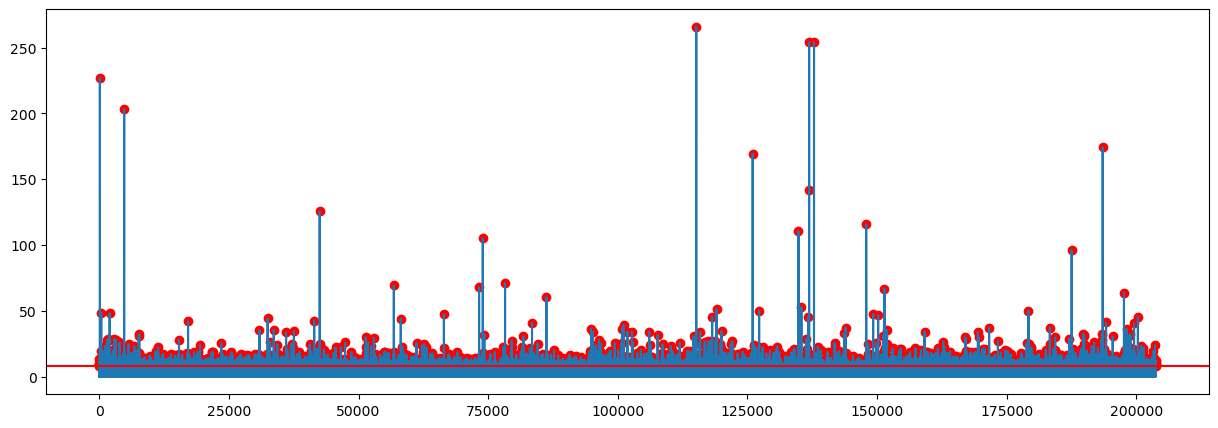

In [49]:
plt.figure(figsize=(15, 5))
plt.plot(avg_distances)
plt.axhline(y=threshold, color='r', linestyle='-')
# plot outliers
plt.scatter(outliers, avg_distances[outliers], color='r')
plt.show()

In [124]:
outlier_index = np.where(avg_distances > threshold)
outlier_values = data_with_index.iloc[outlier_index]
outlier_values

,node,closeness_centrality,betweenness_centrality,eigenvector_centrality,active_days,eccentricity,pagerank_std_last_month,in_out_degree_ratio,weightsin_weightsout_ratio,numin_numout_ratio,centrality_sum,rolling_average_pagerank,cumulative_interaction_count,pagerank_change,pagerank_closeness_interaction
5,0xeed16856d551569d134530ee3967ec79995e2051,0.110763,8.690026e-03,6.999781e-03,355.0,7.0,0.000000e+00,0.009493,1.000000,1.000000,1.264524e-01,4.040438e-07,17235.0,-2.963589e-09,1.505883e-08
6,0x7a3c8f60caff89a412952f82489fe630f0f78eb9,0.158346,1.946983e-03,6.504776e-03,10.0,6.0,0.000000e+00,1.000000,1.000000,0.002658,1.667974e-01,3.278109e-04,17247.0,9.828650e-04,1.556665e-04
7,0xd3273eba07248020bf98a8b560ec1576a612102f,0.110919,5.553778e-03,5.626967e-03,338.0,7.0,0.000000e+00,0.009568,0.691211,1.000000,1.221002e-01,1.927621e-07,25661.0,1.489850e-07,3.232729e-08
8,0x3b0bc51ab9de1e5b7b6e34e5b960285805c41736,0.110772,7.868799e-03,6.643094e-03,365.0,7.0,0.000000e+00,0.010565,0.074182,1.000000,1.252840e-01,1.870091e-07,34018.0,1.451997e-07,3.102535e-08
9,0x003e36550908907c2a2da960fd19a419b9a774b7,0.099905,1.589787e-03,6.900249e-03,272.0,7.0,1.793487e-04,0.045513,1.000000,1.000000,1.083948e-01,1.358950e-05,40942.0,4.034795e-05,4.045223e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29456,0xdcf880ba3487a4e95259d79994226b1e4f8d9458,0.000000,0.000000e+00,1.285257e-05,1.0,8.0,1.037354e-07,0.666667,1.000000,1.000000,1.285257e-05,3.237338e-07,5333250.0,5.717189e-07,0.000000e+00
29457,0x2ff58a66bf3073e4c6016e1a5d8d8eb6483f5723,0.120039,0.000000e+00,4.736295e-04,1.0,8.0,0.000000e+00,1.000000,0.288970,0.500000,1.205131e-01,1.331627e-07,5337613.0,5.578834e-12,1.598523e-08
29458,0x0d8415be40925d965ade2cd62be5680389d640e4,0.110962,6.770483e-06,3.166462e-05,1.0,8.0,2.400348e-08,0.500000,0.504685,1.000000,1.110003e-01,1.985535e-07,5338232.0,-8.968140e-08,1.539773e-08
29459,0xe4edc0ee94ba28ac89d7304c72fa95081a3bef72,0.086852,2.634004e-07,1.122154e-04,2.0,8.0,3.365868e-08,0.500000,0.981012,1.000000,8.696465e-02,1.845676e-07,5338238.0,-1.316392e-07,1.254592e-08


In [125]:
outliers_value_class = outlier_values.merge(labels_with_index, left_on='node', right_on='node', how='left')

In [126]:
percentage_1 = outliers_value_class[outliers_value_class['isp'] == '1'].shape[0] / outlier_values.shape[0]
print("Percentage of outliers that are labeled as 1: ", percentage_1)
print("Inside outliers number of illicit:", outliers_value_class[outliers_value_class['isp'] == '1'].shape[0])
print("Total outliers number:", outlier_values.shape[0])

Percentage of outliers that are labeled as 1:  0.0
Inside outliers number of illicit: 0
Total outliers number: 1473
